## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**casual:** count of casual users.

**registered:** count of registered users

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.
4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


### 1. Load the dataset from Kaggle. Use the "hour.csv" file.

In [4]:
import os
import kagglehub

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import xgboost as xgb
from matplotlib.ticker import FixedLocator
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

c:\Users\Bruger\anaconda3\envs\python_3_10_16\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bruger\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [7]:
import re

dataset_path = "C:/Users/Bruger/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1"
files = os.listdir(dataset_path)
#print(files)

found_file = False
for file in files:
    if re.search(r"hour.csv", file):
        file_path = dataset_path + "/" + file 
        df = pd.read_csv(file_path)
        found_file = True
        print("Succesfully loaded file: " + file)
        break
        
if not found_file:
    print("Couldn't load the file")

Succesfully loaded file: hour.csv


In [8]:
df = df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "bike count"
})

In [9]:
df

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## 2. Visualize the structure of the dataset using appropriate libraries and plots.

In [10]:
df.describe().T # the ".T" changes the way it is displayed, with the count, mean etc. on the columns instead of the rows

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
year,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  bike count  17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


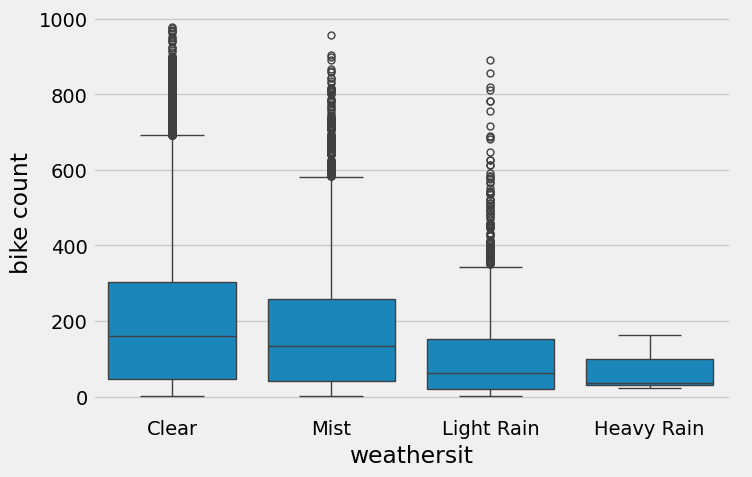

In [12]:
g = sns.catplot(data=df, x="weathersit", y="bike count", kind="box", height=5, aspect=1.5)
g.set_xticklabels(["Clear", "Mist", "Light Rain", "Heavy Rain"])

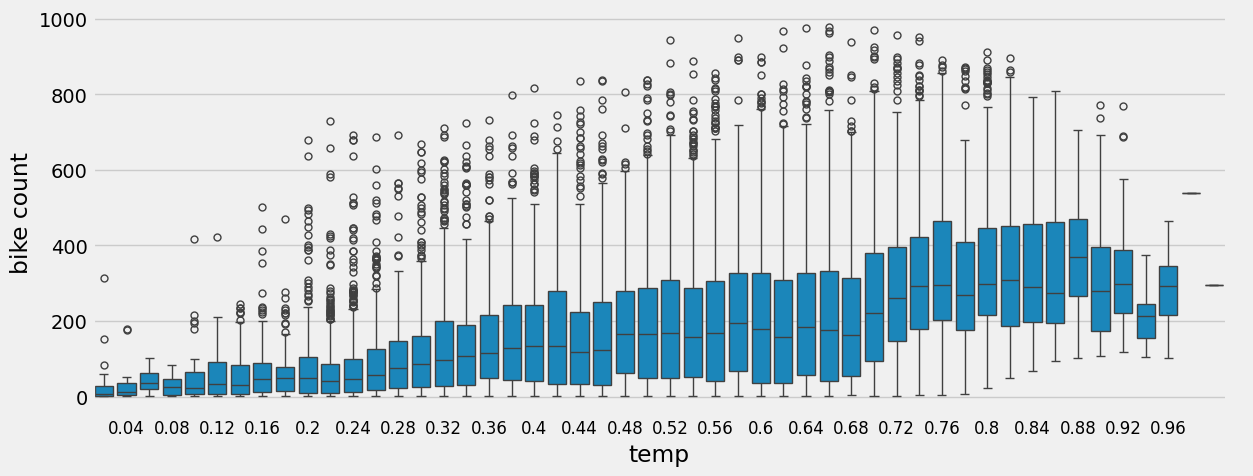

In [13]:
g = sns.catplot(data=df, x="temp", y="bike count", kind="box", height=5, aspect=2.5) 
plt.xticks(fontsize=12)
ax = plt.gca()  # Get the current axes
tick_positions = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47]  # The exact locations where you want ticks
locator = FixedLocator(tick_positions) # where should ticker come from?
ax.xaxis.set_major_locator(locator)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=45) ## this prints out all the labels, super anoying

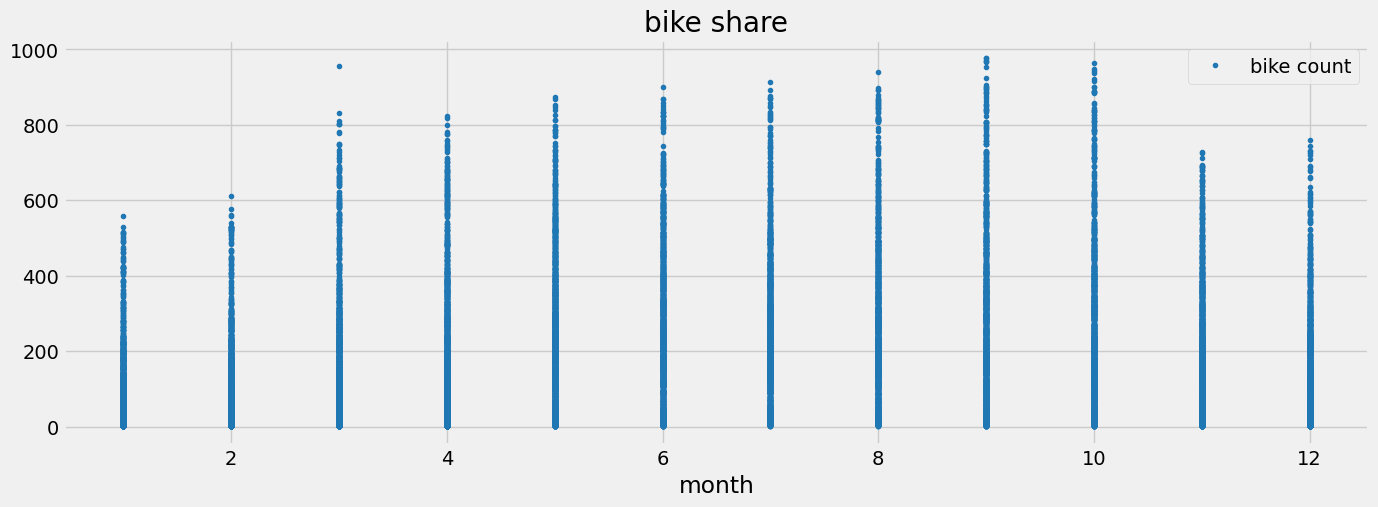

In [14]:
df.plot(style='.', x="month", y="bike count",
        figsize=(15, 5),
        color=color_pal[0],
        title='bike share')
plt.show()

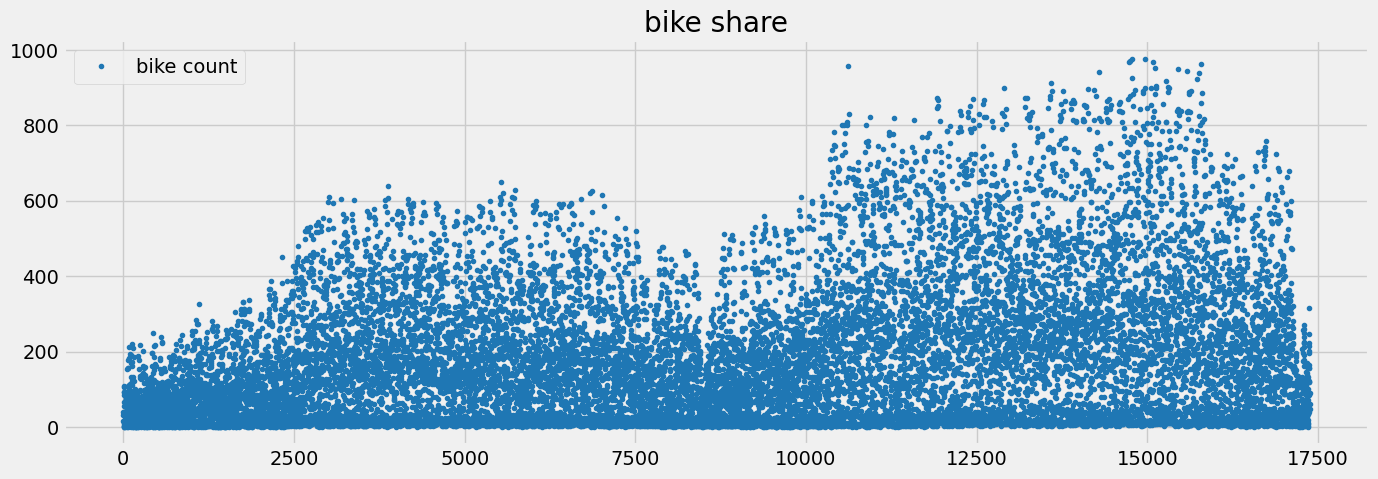

In [15]:
df.plot(style='.', y="bike count",
        figsize=(15, 5),
        color=color_pal[0],
        title='bike share')
plt.show()

## 3. Clean and pre-process the dataset as required and prepare the data for modelling.

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.isna().sum()

instant       0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
bike count    0
dtype: int64

In [18]:
df = df.drop("instant", axis=1)

In [19]:
df['day hour'] = df["date"].astype(str) + ' ' + df['hour'].apply(lambda x: f'{x:02}:00:00') 

    Could replace the index with this "day hour" and also remove the hour column

In [20]:
df = df.set_index('date')
df.index = pd.to_datetime(df.index)
#df = df.sort_index() # thinks this groups the date and calculates the sum instead, but that removes the hour column and info
df

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike count,day hour
date,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00


In [21]:
start = df.index.min()
end = df.index.max()

print("Start date:       ", start)
print("End date:         ", end)

print("Interval in days: ", end - start)

Start date:        2011-01-01 00:00:00
End date:          2012-12-31 00:00:00
Interval in days:  730 days 00:00:00


 ## 4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.

In [22]:
df["lag_1d"] = df["bike count"].shift(24) # shift 1 day
df["lag_1w"] = df["bike count"].shift(7*24) # shift 1 week
df["lag_1m"] = df["bike count"].shift(30*24) # shift 1 month

df["rolling_mean_3h"] = df["bike count"].rolling(window=3).mean() # shift 3 hours mean
df["rolling_mean_3d"] = df["bike count"].rolling(window=24*3).mean() # shift 3 days mean

In [23]:
print(df.isna().sum())
df = df.copy().dropna()

print(df.isna().sum())

season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weathersit           0
temp                 0
atemp                0
hum                  0
windspeed            0
casual               0
registered           0
bike count           0
day hour             0
lag_1d              24
lag_1w             168
lag_1m             720
rolling_mean_3h      2
rolling_mean_3d     71
dtype: int64
season             0
year               0
month              0
hour               0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
registered         0
bike count         0
day hour           0
lag_1d             0
lag_1w             0
lag_1m             0
rolling_mean_3h    0
rolling_mean_3d    0
dtype: int64


## 6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.

In [35]:
def display_actual_predict_plot(y_test, y_pred, title='Actual vs Predicted - XG boost'):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed', alpha=0.5)

    plt.xticks(fontsize=10) # should potentionally transform the date to only show the day and hour, or display hours in increment hour1, hour2...
    ax = plt.gca()  # Get the current axes
    tick_positions = [1, 40, 80, 120, 160, 200]  # The exact locations where you want ticks
    locator = FixedLocator(tick_positions)
    ax.xaxis.set_major_locator(locator)
    
    plt.title(title)
    plt.xlabel('Hours')
    plt.ylabel('Bike count')
    plt.legend()
    plt.show()

In [ ]:
def train_model_XG_Boost(test_start_date, FEATURES_XGB, params):
    TARGET = 'bike count'

    valid_size = len(df) - (7 * 24)  # Keep last week as test data

    train, validation = df.iloc[:valid_size], df.iloc[valid_size:]
    test = df.loc[df.index >= test_start_date]
    train.index = train["day hour"]
    validation.index = validation["day hour"]
    test.index = test["day hour"]

    X_train_xgb = train[FEATURES_XGB]
    y_train_xgb = train[TARGET]
   
    X_validation_xgb = validation[FEATURES_XGB]
    y_validation_xgb = validation[TARGET]
    
    X_test_xgb = test[FEATURES_XGB]
    y_test_xgb = test[TARGET]

    dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
    dvalidation = xgb.DMatrix(X_validation_xgb, label=y_validation_xgb)
    dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

    watchlist = [(dtrain, 'train'), (dvalidation, 'eval')]
    
    num_round = 1000  # Number of boosting rounds
    early_stopping_rounds = 50
    
    # Train the model
    reg = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=100)
    
    # # Predict on the test set
    y_validation_pred_xgb = reg.predict(dvalidation)
    y_pred_xgb = reg.predict(dtest)
    
    # # Evaluate the performance (optional, to see RMSE)
    rmse_xgb = root_mean_squared_error(y_test_xgb, y_pred_xgb)
    mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

    # Draw plot
    display_actual_predict_plot(y_validation_xgb, y_validation_pred_xgb, 'Actual vs Predicted(validation) - XG boost')
    display_actual_predict_plot(y_test_xgb, y_pred_xgb)
    
    print(f"XGBoost - RMSE: {rmse_xgb}")
    print(f"XGBoost - MAE:  {mae_xgb}")

In [ ]:
FEATURES_XGB = [
    'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
    'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 
    'lag_1d', 'lag_1w', 'lag_1m',
    'rolling_mean_3h', 'rolling_mean_3d'

    #"lag_1d", "lag_1w", "weathersit", "lag_1m", "rolling_mean_3h", "rolling_mean_3d", "temp", "season"
    #"month", "lag_1d", "lag_1w", "lag_1m"
    #"month", "lag_1d", 
]

TARGET = 'bike count'

In [39]:
def set_params(max_depth = 3, learning_rate = 0.01, colsample_bytree = 0.8, subsample = 0.8):
    return {
        'objective': 'reg:squarederror',  # Objective function for regression
        
        'eval_metric': ['rmse', "mae"],  # Evaluation metric
        
        'max_depth': max_depth, # Depth of the trees
        
        'learning_rate': learning_rate, # Learning rate
        
        'colsample_bytree': colsample_bytree,  # Subsample of features  
        
        'subsample': subsample, # Subsample ratio
    }

### with default params
    RMSE: 27.065     
    MAE:  19.78

### Best achieved outcome
    RMSE: 19.67      
    MAE:  13.00

[0]	train-rmse:181.66836	train-mae:142.93592	eval-rmse:140.62354	eval-mae:128.26565
[100]	train-rmse:93.62727	train-mae:71.64372	eval-rmse:68.50456	eval-mae:63.19457
[200]	train-rmse:64.12251	train-mae:46.73936	eval-rmse:44.12963	eval-mae:37.90609
[300]	train-rmse:54.27390	train-mae:37.72047	eval-rmse:36.53050	eval-mae:28.73802
[400]	train-rmse:50.03280	train-mae:34.06090	eval-rmse:33.00982	eval-mae:24.80707
[500]	train-rmse:47.02470	train-mae:31.74161	eval-rmse:30.97297	eval-mae:22.71007
[600]	train-rmse:44.98805	train-mae:30.25189	eval-rmse:29.34436	eval-mae:21.27524
[700]	train-rmse:43.20630	train-mae:28.98358	eval-rmse:27.98394	eval-mae:20.29630
[800]	train-rmse:41.74481	train-mae:28.05442	eval-rmse:27.41567	eval-mae:19.98458
[900]	train-rmse:40.62013	train-mae:27.30669	eval-rmse:27.12229	eval-mae:19.71989
[999]	train-rmse:39.47322	train-mae:26.54513	eval-rmse:26.89622	eval-mae:19.57162


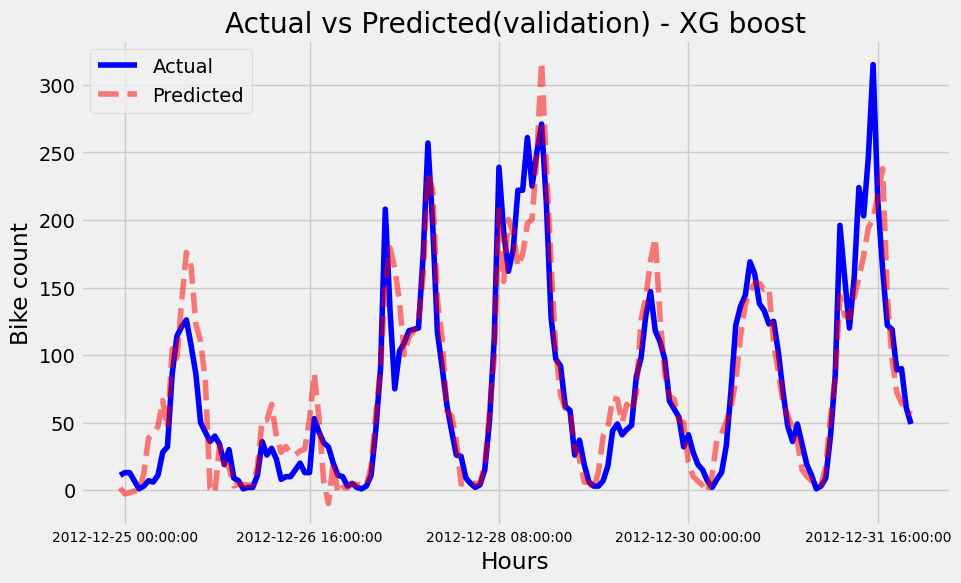

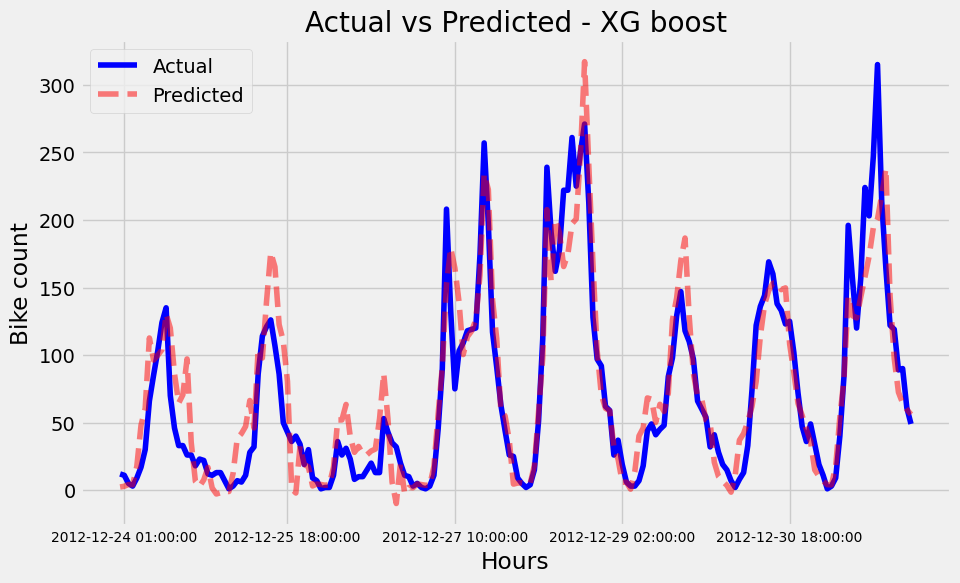

XGBoost - RMSE: 27.03108787536621
XGBoost - MAE:  19.758747100830078


In [40]:
train_model_XG_Boost('2012-12-24', FEATURES_XGB, set_params())